In [1]:
pip install numpy matplotlib scikit-learn scikit-learn-extra


a


In [5]:
pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 5.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-macosx_11_0_arm64.whl size=393174 sha256=b4094bc08841ac3304a0073039ba48c7c24489c7efdba15ddc95651abe955829
  Stored in directory: /Users/ashish/Library/Caches/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def k_center_approach(image_features_dict, K):
    # Convert dictionary into a list of images and their corresponding features
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))
    
    # Select the first point randomly
    selected_indices = [np.random.choice(len(features))]
    selected_features = features[selected_indices]
    
    for _ in range(K - 1):
        # Compute the distance from each point to the nearest representative
        distances = euclidean_distances(features, selected_features).min(axis=1)
        # Select the farthest point
        farthest_point_idx = np.argmax(distances)
        selected_indices.append(farthest_point_idx)
        selected_features = np.vstack([selected_features, features[farthest_point_idx]])
    
    selected_images = [image_names[i] for i in selected_indices]
    return selected_images


In [3]:
from sklearn_extra.cluster import KMedoids

def k_medoids_approach(image_features_dict, K):
    # Convert dictionary into a list of images and their corresponding features
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))
    
    # Use KMedoids with Euclidean distance (or change metric to 'cosine' if needed)
    kmedoids = KMedoids(n_clusters=K, metric='euclidean').fit(features)
    
    # Get medoid indices
    medoid_indices = kmedoids.medoid_indices_
    selected_images = [image_names[i] for i in medoid_indices]
    
    return selected_images


ModuleNotFoundError: No module named 'sklearn_extra'

In [4]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(image_features_dict, selected_images):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    # Run t-SNE to reduce dimensions to 2D
    tsne = TSNE(n_components=2, random_state=42)
    reduced_features = tsne.fit_transform(features)

    # Plot the reduced features
    plt.figure(figsize=(10, 6))
    for i, image_name in enumerate(image_names):
        x, y = reduced_features[i]
        plt.scatter(x, y, label=image_name if image_name in selected_images else '', color='blue' if image_name not in selected_images else 'red')
        
    # Highlight the selected images
    for i, image_name in enumerate(image_names):
        if image_name in selected_images:
            x, y = reduced_features[i]
            plt.scatter(x, y, color='red', edgecolor='black', s=100, marker='o')
            plt.text(x + 0.01, y + 0.01, image_name, fontsize=9)
    
    plt.title("t-SNE visualization of image features")
    plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn_extra.cluster import KMedoids
from sklearn.manifold import TSNE

# Sample Data: image feature dictionary (replace this with actual data)
image_features_dict = {
    'image1': np.random.rand(512),  # Replace these random values with actual features
    'image2': np.random.rand(512),
    'image3': np.random.rand(512),
    'image4': np.random.rand(512),
    'image5': np.random.rand(512),
    'image6': np.random.rand(512),
    'image7': np.random.rand(512),
    'image8': np.random.rand(512),
    'image9': np.random.rand(512),
    'image10': np.random.rand(512),
}

# K-center approach
def k_center_approach(image_features_dict, K):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    # Select the first point randomly
    selected_indices = [np.random.choice(len(features))]
    selected_features = features[selected_indices]

    for _ in range(K - 1):
        # Compute the distance from each point to the nearest representative
        distances = euclidean_distances(features, selected_features).min(axis=1)
        # Select the farthest point
        farthest_point_idx = np.argmax(distances)
        selected_indices.append(farthest_point_idx)
        selected_features = np.vstack([selected_features, features[farthest_point_idx]])

    selected_images = [image_names[i] for i in selected_indices]
    return selected_images

# K-medoids approach
def k_medoids_approach(image_features_dict, K):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    # Use KMedoids with Euclidean distance
    kmedoids = KMedoids(n_clusters=K, metric='euclidean', random_state=42).fit(features)

    # Get medoid indices
    medoid_indices = kmedoids.medoid_indices_
    selected_images = [image_names[i] for i in medoid_indices]

    return selected_images

# Visualization using t-SNE
def visualize(image_features_dict, selected_images_k_center, selected_images_k_medoids):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    # Reduce dimensions to 2D using t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    reduced_features = tsne.fit_transform(features)

    plt.figure(figsize=(12, 8))

    # Plot the reduced features
    for i, image_name in enumerate(image_names):
        x, y = reduced_features[i]
        if image_name in selected_images_k_center:
            plt.scatter(x, y, color='red', edgecolor='black', s=100, marker='o')
            plt.text(x + 0.01, y + 0.01, image_name, fontsize=9, color='red', weight='bold')
        elif image_name in selected_images_k_medoids:
            plt.scatter(x, y, color='blue', edgecolor='black', s=100, marker='s')
            plt.text(x + 0.01, y + 0.01, image_name, fontsize=9, color='blue', weight='bold')
        else:
            plt.scatter(x, y, color='gray')

    plt.title("t-SNE visualization of image features")
    plt.legend(['K-center (red)', 'K-medoids (blue)', 'Other points (gray)'])
    plt.show()

# Set the value of K (number of representatives)
K = 3

# Apply K-center and K-medoids approaches
selected_images_k_center = k_center_approach(image_features_dict, K)
selected_images_k_medoids = k_medoids_approach(image_features_dict, K)

# Visualize the results
visualize(image_features_dict, selected_images_k_center, selected_images_k_medoids)


ValueError: perplexity must be less than n_samples

In [11]:
# Visualization using t-SNE
def visualize(image_features_dict, selected_images_k_center, selected_images_k_medoids):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    # Run t-SNE with smaller perplexity
    tsne = TSNE(n_components=2, random_state=42, perplexity=3)
    reduced_features = tsne.fit_transform(features)

    plt.figure(figsize=(12, 8))

    # Plot the reduced features
    for i, image_name in enumerate(image_names):
        x, y = reduced_features[i]
        if image_name in selected_images_k_center:
            plt.scatter(x, y, color='red', edgecolor='black', s=100, marker='o')
            plt.text(x + 0.01, y + 0.01, image_name, fontsize=9, color='red', weight='bold')
        elif image_name in selected_images_k_medoids:
            plt.scatter(x, y, color='blue', edgecolor='black', s=100, marker='s')
            plt.text(x + 0.01, y + 0.01, image_name, fontsize=9, color='blue', weight='bold')
        else:
            plt.scatter(x, y, color='gray')

    plt.title("t-SNE visualization of image features")
    plt.legend(['K-center (red)', 'K-medoids (blue)', 'Other points (gray)'])
    plt.show()


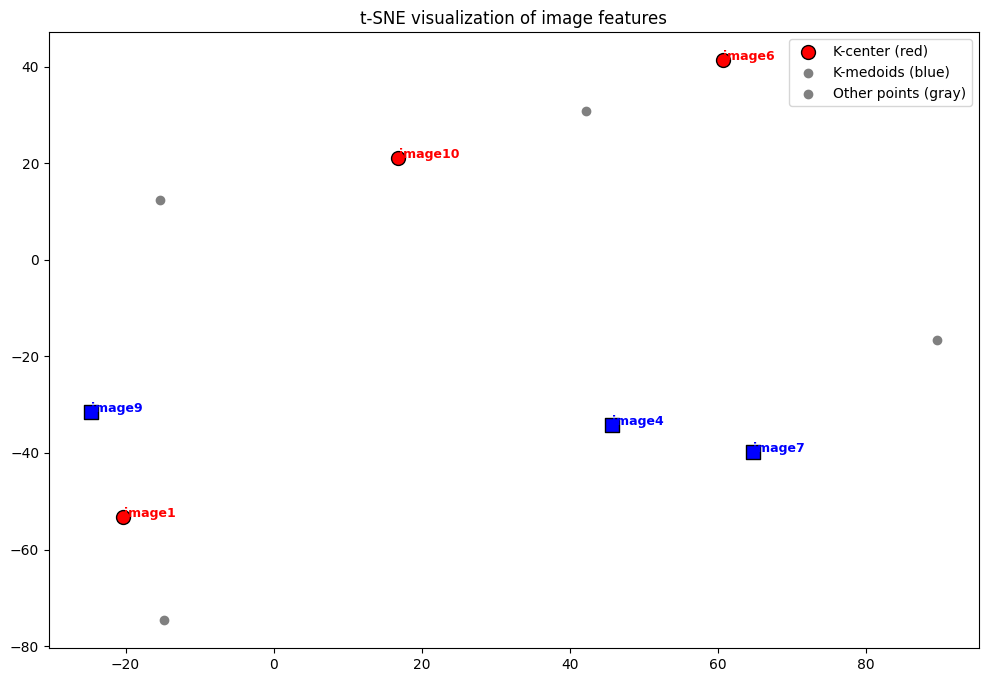

In [9]:
# Set the value of K (number of representatives)
K = 3

# Apply K-center and K-medoids approaches
selected_images_k_center = k_center_approach(image_features_dict, K)
selected_images_k_medoids = k_medoids_approach(image_features_dict, K)

# Visualize the results
visualize(image_features_dict, selected_images_k_center, selected_images_k_medoids)


Files already downloaded and verified


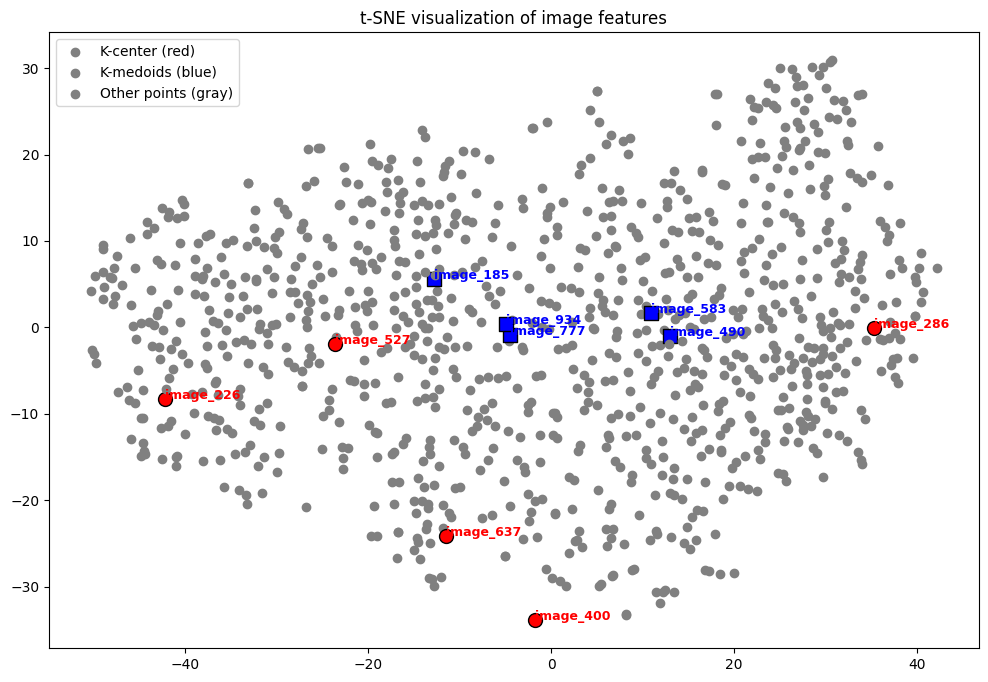

In [18]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics.pairwise import euclidean_distances
from sklearn_extra.cluster import KMedoids
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=False)

# Load pre-trained ResNet-18 model
resnet18 = torchvision.models.resnet18(pretrained=True)
resnet18 = nn.Sequential(*list(resnet18.children())[:-1])  # Remove the last classification layer
resnet18.eval()

# Function to extract features using ResNet-18
def extract_features(loader, model):
    features_dict = {}
    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            outputs = outputs.view(outputs.size(0), -1)  # Flatten the features
            for i in range(len(labels)):
                features_dict[f'image_{len(features_dict)}'] = outputs[i].cpu().numpy()
            # Limit the number of samples for demo purposes
            if len(features_dict) >= 1000:
                break
    return features_dict

# Extract features
image_features_dict = extract_features(trainloader, resnet18)

# K-center approach
def k_center_approach(image_features_dict, K):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    selected_indices = [np.random.choice(len(features))]
    selected_features = features[selected_indices]

    for _ in range(K - 1):
        distances = euclidean_distances(features, selected_features).min(axis=1)
        farthest_point_idx = np.argmax(distances)
        selected_indices.append(farthest_point_idx)
        selected_features = np.vstack([selected_features, features[farthest_point_idx]])

    selected_images = [image_names[i] for i in selected_indices]
    return selected_images

# K-medoids approach
def k_medoids_approach(image_features_dict, K):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    kmedoids = KMedoids(n_clusters=K, metric='euclidean', random_state=42).fit(features)
    medoid_indices = kmedoids.medoid_indices_
    selected_images = [image_names[i] for i in medoid_indices]

    return selected_images

# Visualization using t-SNE
def visualize(image_features_dict, selected_images_k_center, selected_images_k_medoids):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    perplexity_value = min(20, len(features) - 1)
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
    reduced_features = tsne.fit_transform(features)

    plt.figure(figsize=(12, 8))

    for i, image_name in enumerate(image_names):
        x, y = reduced_features[i]
        if image_name in selected_images_k_center:
            plt.scatter(x, y, color='red', edgecolor='black', s=100, marker='o')
            plt.text(x + 0.01, y + 0.01, image_name, fontsize=9, color='red', weight='bold')
        elif image_name in selected_images_k_medoids:
            plt.scatter(x, y, color='blue', edgecolor='black', s=100, marker='s')
            plt.text(x + 0.01, y + 0.01, image_name, fontsize=9, color='blue', weight='bold')
        else:
            plt.scatter(x, y, color='gray')

    plt.title("t-SNE visualization of image features")
    plt.legend(['K-center (red)', 'K-medoids (blue)', 'Other points (gray)'])
    plt.show()

# Set number of samples to select
K = 5

# Apply K-center and K-medoids approaches
selected_images_k_center = k_center_approach(image_features_dict, K)
selected_images_k_medoids = k_medoids_approach(image_features_dict, K)

# Visualize the results
visualize(image_features_dict, selected_images_k_center, selected_images_k_medoids)


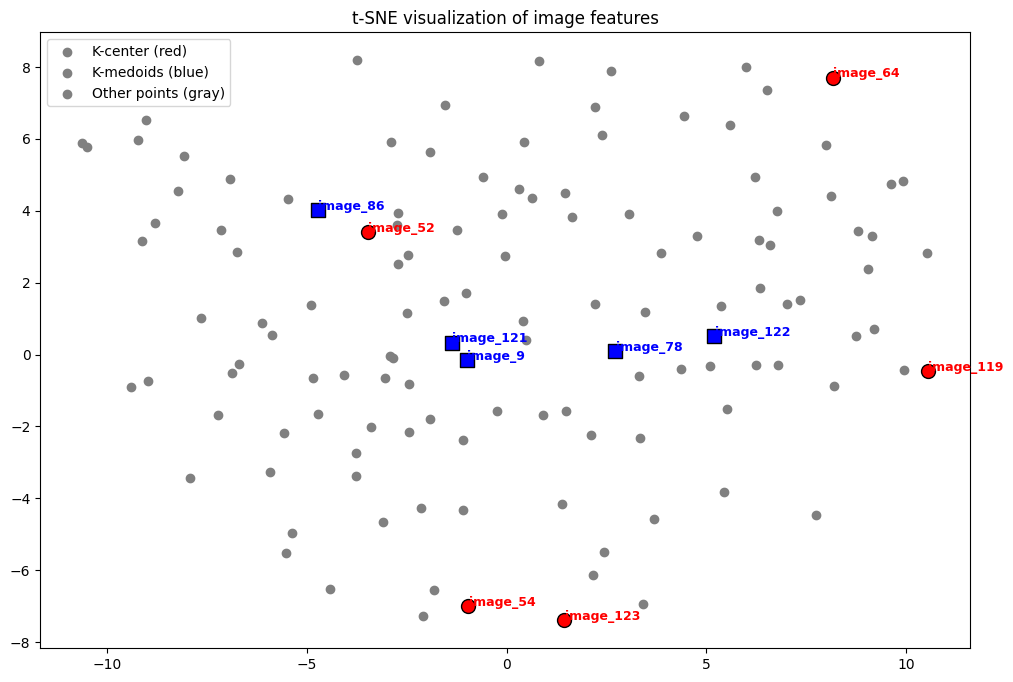

In [16]:
visualize(image_features_dict, selected_images_k_center, selected_images_k_medoids)

Files already downloaded and verified


/Users/ashish/miniconda3/envs/MLDS/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ashish/miniconda3/envs/MLDS/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


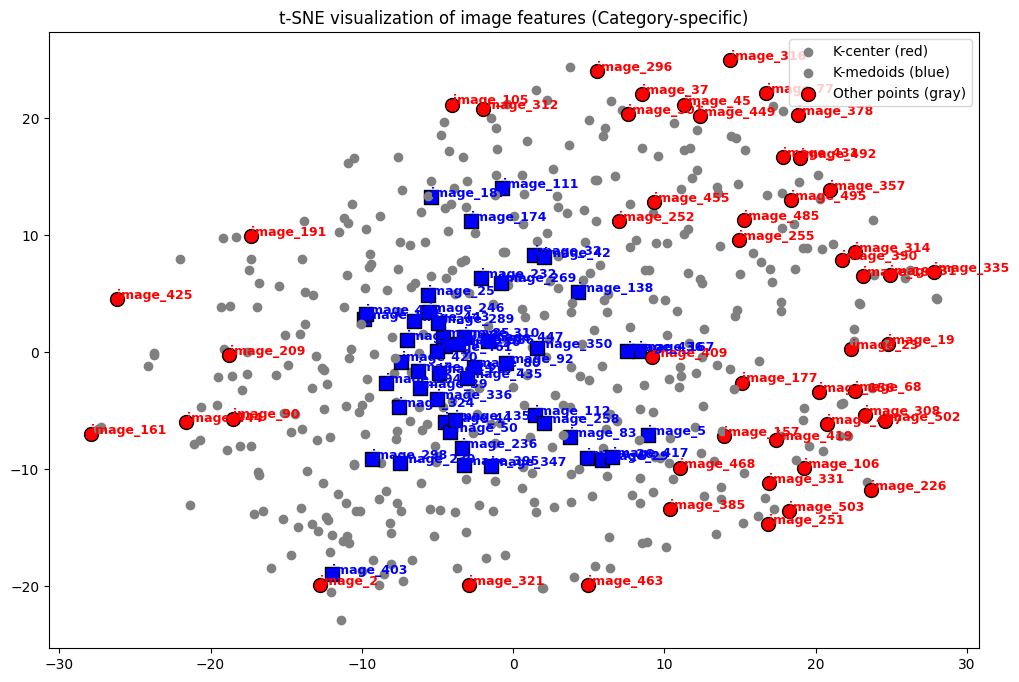

In [22]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics.pairwise import euclidean_distances
from sklearn_extra.cluster import KMedoids
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=False)

# Load pre-trained ResNet-18 model
resnet18 = torchvision.models.resnet18(pretrained=True)
resnet18 = nn.Sequential(*list(resnet18.children())[:-1])  # Remove the last classification layer
resnet18.eval()

# Function to extract features using ResNet-18 for a specific category
def extract_features_by_category(loader, model, target_category):
    features_dict = {}
    with torch.no_grad():
        for images, labels in loader:
            # Select only images of the target category
            mask = labels == target_category
            selected_images = images[mask]
            if len(selected_images) == 0:
                continue

            outputs = model(selected_images)
            outputs = outputs.view(outputs.size(0), -1)  # Flatten the features
            for i in range(len(selected_images)):
                features_dict[f'image_{len(features_dict)}'] = outputs[i].cpu().numpy()

            # Limit the number of samples for demo purposes
            if len(features_dict) >= 500:
                break
    return features_dict

# Extract features for category 'cat' (label 3 in CIFAR-10)
category_label = 3  # Change this to select a different category
image_features_dict = extract_features_by_category(trainloader, resnet18, category_label)

# K-center approach
def k_center_approach(image_features_dict, K):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    selected_indices = [np.random.choice(len(features))]
    selected_features = features[selected_indices]

    for _ in range(K - 1):
        distances = euclidean_distances(features, selected_features).min(axis=1)
        farthest_point_idx = np.argmax(distances)
        selected_indices.append(farthest_point_idx)
        selected_features = np.vstack([selected_features, features[farthest_point_idx]])

    selected_images = [image_names[i] for i in selected_indices]
    return selected_images

# K-medoids approach
def k_medoids_approach(image_features_dict, K):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    kmedoids = KMedoids(n_clusters=K, metric='euclidean', random_state=42).fit(features)
    medoid_indices = kmedoids.medoid_indices_
    selected_images = [image_names[i] for i in medoid_indices]

    return selected_images

# Visualization using t-SNE
def visualize(image_features_dict, selected_images_k_center, selected_images_k_medoids):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    perplexity_value = min(20, len(features) - 1)
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
    reduced_features = tsne.fit_transform(features)

    plt.figure(figsize=(12, 8))

    for i, image_name in enumerate(image_names):
        x, y = reduced_features[i]
        if image_name in selected_images_k_center:
            plt.scatter(x, y, color='red', edgecolor='black', s=100, marker='o')
            plt.text(x + 0.01, y + 0.01, image_name, fontsize=9, color='red', weight='bold')
        elif image_name in selected_images_k_medoids:
            plt.scatter(x, y, color='blue', edgecolor='black', s=100, marker='s')
            plt.text(x + 0.01, y + 0.01, image_name, fontsize=9, color='blue', weight='bold')
        else:
            plt.scatter(x, y, color='gray')

    plt.title("t-SNE visualization of image features (Category-specific)")
    plt.legend(['K-center (red)', 'K-medoids (blue)', 'Other points (gray)'])
    plt.show()

# Set number of samples to select
K = 50

# Apply K-center and K-medoids approaches
selected_images_k_center = k_center_approach(image_features_dict, K)
selected_images_k_medoids = k_medoids_approach(image_features_dict, K)

# Visualize the results
visualize(image_features_dict, selected_images_k_center, selected_images_k_medoids)


How to Change the Category:
You can change the variable category_label to select a different class:

0 = Airplane
1 = Automobile
2 = Bird
3 = Cat
4 = Deer
5 = Dog
6 = Frog
7 = Horse
8 = Ship
9 = Truck


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

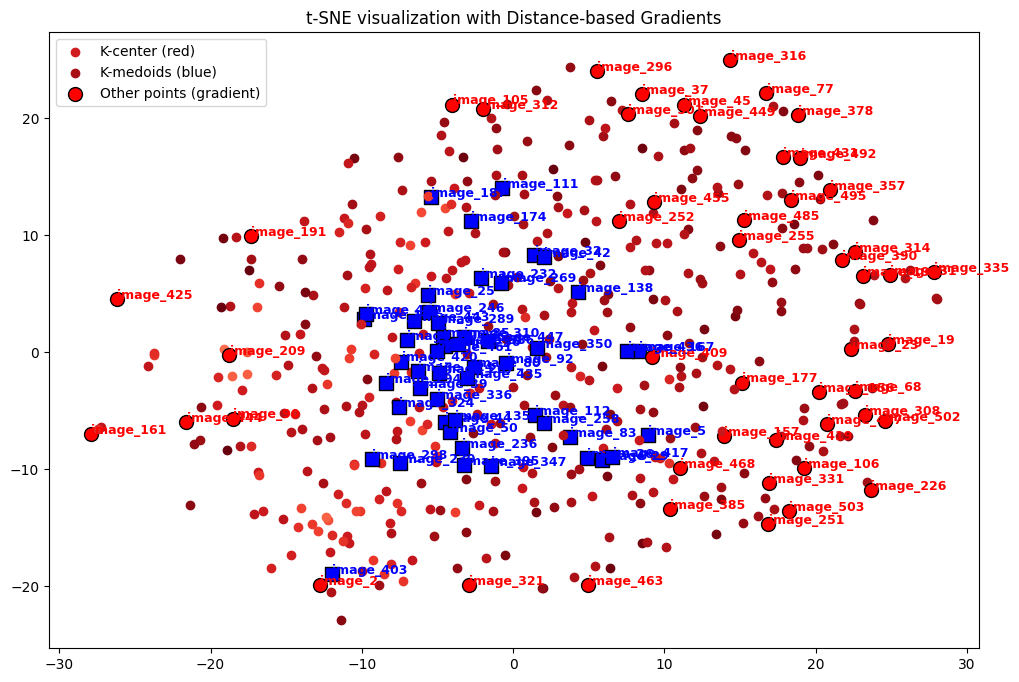

In [23]:
from matplotlib import cm

def visualize_with_gradients(image_features_dict, selected_images_k_center, selected_images_k_medoids):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    perplexity_value = min(20, len(features) - 1)
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
    reduced_features = tsne.fit_transform(features)

    plt.figure(figsize=(12, 8))

    # Calculate distances from selected points
    features_array = np.array(list(image_features_dict.values()))
    k_center_features = np.array([image_features_dict[img] for img in selected_images_k_center])
    k_medoids_features = np.array([image_features_dict[img] for img in selected_images_k_medoids])
    
    distances_k_center = euclidean_distances(features_array, k_center_features).min(axis=1)
    distances_k_medoids = euclidean_distances(features_array, k_medoids_features).min(axis=1)

    # Normalize distances for color mapping
    norm_center = plt.Normalize(distances_k_center.min(), distances_k_center.max())
    norm_medoids = plt.Normalize(distances_k_medoids.min(), distances_k_medoids.max())
    
    colors_k_center = cm.Reds(norm_center(distances_k_center))
    colors_k_medoids = cm.Blues(norm_medoids(distances_k_medoids))

    for i, image_name in enumerate(image_names):
        x, y = reduced_features[i]
        if image_name in selected_images_k_center:
            plt.scatter(x, y, color='red', edgecolor='black', s=100, marker='o')
            plt.text(x + 0.01, y + 0.01, image_name, fontsize=9, color='red', weight='bold')
        elif image_name in selected_images_k_medoids:
            plt.scatter(x, y, color='blue', edgecolor='black', s=100, marker='s')
            plt.text(x + 0.01, y + 0.01, image_name, fontsize=9, color='blue', weight='bold')
        else:
            # Use gradients for other points
            plt.scatter(x, y, color=colors_k_center[i] if image_name not in selected_images_k_medoids else colors_k_medoids[i])

    plt.title("t-SNE visualization with Distance-based Gradients")
    plt.legend(['K-center (red)', 'K-medoids (blue)', 'Other points (gradient)'])
    plt.colorbar(cm.ScalarMappable(norm=norm_center, cmap=cm.Reds), label='Distance from K-center')
    plt.colorbar(cm.ScalarMappable(norm=norm_medoids, cmap=cm.Blues), label='Distance from K-medoids')
    plt.show()

# Call the function with the same selected images
visualize_with_gradients(image_features_dict, selected_images_k_center, selected_images_k_medoids)


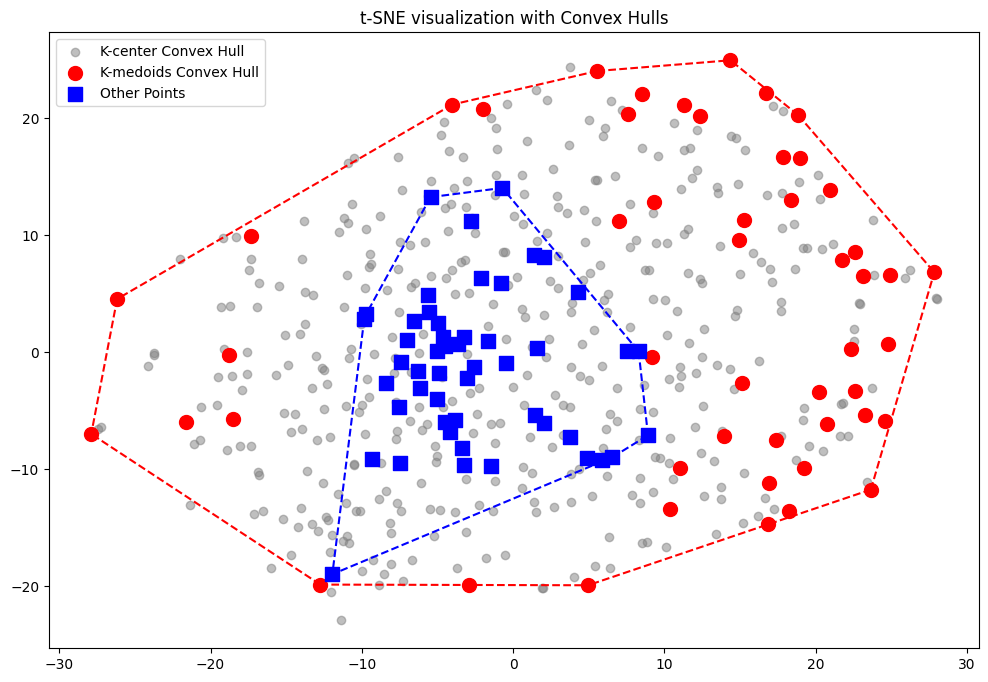

In [24]:
from scipy.spatial import ConvexHull

def visualize_with_convex_hull(image_features_dict, selected_images_k_center, selected_images_k_medoids):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    perplexity_value = min(20, len(features) - 1)
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
    reduced_features = tsne.fit_transform(features)

    plt.figure(figsize=(12, 8))

    # Plot all points
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], color='gray', alpha=0.5)

    # Plot K-center points
    center_features = np.array([reduced_features[i] for i, name in enumerate(image_names) if name in selected_images_k_center])
    plt.scatter(center_features[:, 0], center_features[:, 1], color='red', s=100, marker='o')

    # Plot K-medoids points
    medoids_features = np.array([reduced_features[i] for i, name in enumerate(image_names) if name in selected_images_k_medoids])
    plt.scatter(medoids_features[:, 0], medoids_features[:, 1], color='blue', s=100, marker='s')

    # Draw convex hull for K-center
    if len(center_features) > 2:
        hull = ConvexHull(center_features)
        for simplex in hull.simplices:
            plt.plot(center_features[simplex, 0], center_features[simplex, 1], 'r--')

    # Draw convex hull for K-medoids
    if len(medoids_features) > 2:
        hull = ConvexHull(medoids_features)
        for simplex in hull.simplices:
            plt.plot(medoids_features[simplex, 0], medoids_features[simplex, 1], 'b--')

    plt.title("t-SNE visualization with Convex Hulls")
    plt.legend(['K-center Convex Hull', 'K-medoids Convex Hull', 'Other Points'])
    plt.show()

# Call the function with the same selected images
visualize_with_convex_hull(image_features_dict, selected_images_k_center, selected_images_k_medoids)


# 3. Voronoi Diagram Visualization
## This can be done using a package like scipy.spatial.Voronoi.

<Figure size 1200x800 with 0 Axes>

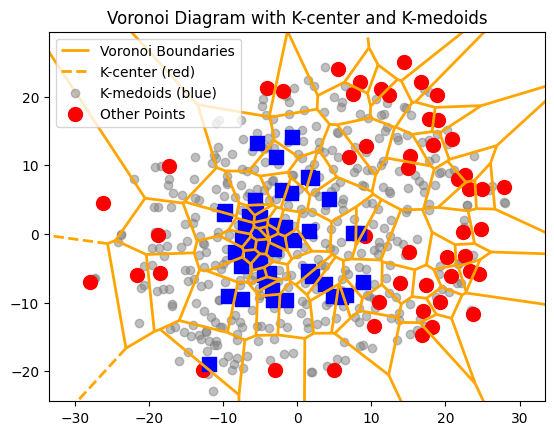

In [25]:
from scipy.spatial import Voronoi, voronoi_plot_2d

def visualize_with_voronoi(image_features_dict, selected_images_k_center, selected_images_k_medoids):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    perplexity_value = min(20, len(features) - 1)
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
    reduced_features = tsne.fit_transform(features)

    plt.figure(figsize=(12, 8))

    # Select points for K-center and K-medoids
    center_features = np.array([reduced_features[i] for i, name in enumerate(image_names) if name in selected_images_k_center])
    medoids_features = np.array([reduced_features[i] for i, name in enumerate(image_names) if name in selected_images_k_medoids])
    
    # Combine for Voronoi
    combined_features = np.vstack([center_features, medoids_features])
    vor = Voronoi(combined_features)

    # Plot Voronoi diagram
    voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2, show_points=False)

    # Plot the points
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], color='gray', alpha=0.5)
    plt.scatter(center_features[:, 0], center_features[:, 1], color='red', s=100, marker='o')
    plt.scatter(medoids_features[:, 0], medoids_features[:, 1], color='blue', s=100, marker='s')

    plt.title("Voronoi Diagram with K-center and K-medoids")
    plt.legend(['Voronoi Boundaries', 'K-center (red)', 'K-medoids (blue)', 'Other Points'])
    plt.show()

# Call the function with the same selected images
visualize_with_voronoi(image_features_dict, selected_images_k_center, selected_images_k_medoids)


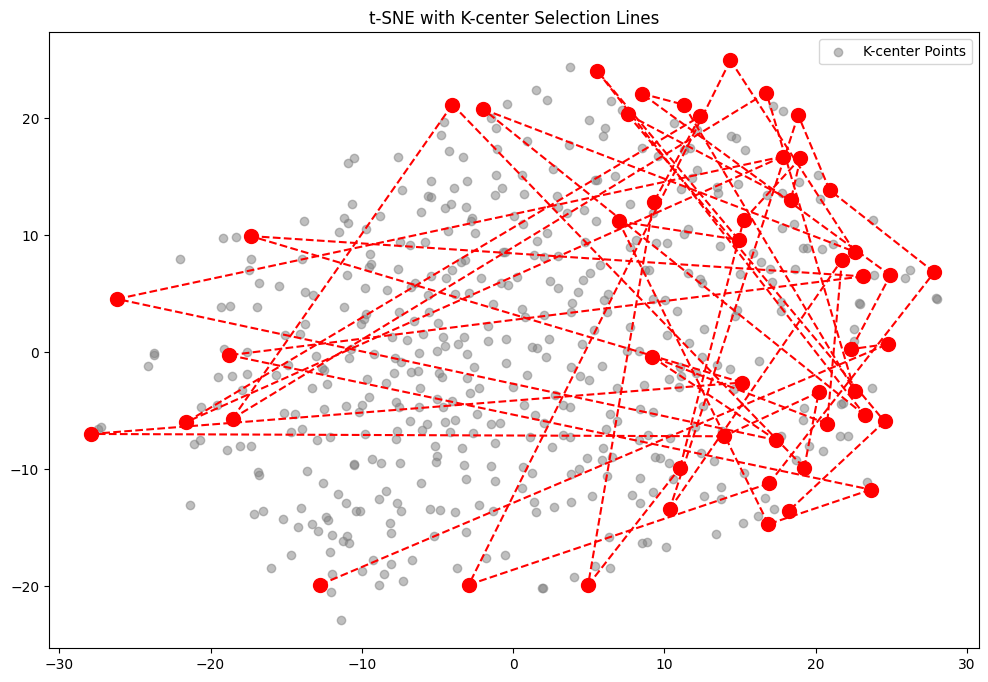

In [26]:
def visualize_with_lines(image_features_dict, selected_images_k_center):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    perplexity_value = min(20, len(features) - 1)
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
    reduced_features = tsne.fit_transform(features)

    plt.figure(figsize=(12, 8))

    # Plot all points
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], color='gray', alpha=0.5)

    # Plot K-center points
    center_indices = [i for i, name in enumerate(image_names) if name in selected_images_k_center]
    center_features = reduced_features[center_indices]
    plt.scatter(center_features[:, 0], center_features[:, 1], color='red', s=100, marker='o')

    # Connect K-center points with lines
    for i in range(1, len(center_features)):
        plt.plot([center_features[i-1, 0], center_features[i, 0]], [center_features[i-1, 1], center_features[i, 1]], 'r--')

    plt.title("t-SNE with K-center Selection Lines")
    plt.legend(['K-center Points'])
    plt.show()

# Call the function with the same selected images
visualize_with_lines(image_features_dict, selected_images_k_center)


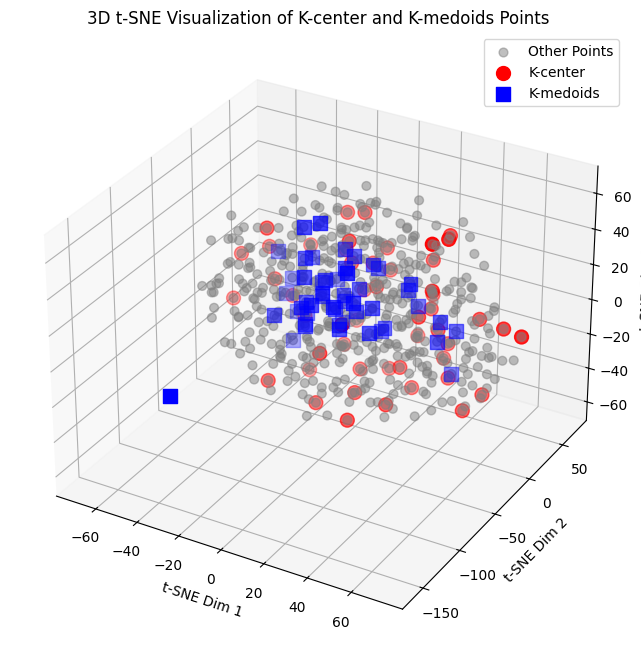

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D

def visualize_in_3d(image_features_dict, selected_images_k_center, selected_images_k_medoids):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    # Use t-SNE to reduce the features to 3 dimensions
    tsne = TSNE(n_components=3, random_state=42, perplexity=30)
    reduced_features = tsne.fit_transform(features)

    # Prepare a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the points
    ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], color='gray', alpha=0.5, s=40, label='Other Points')

    # Plot the K-center points
    k_center_indices = [i for i, name in enumerate(image_names) if name in selected_images_k_center]
    k_center_features = reduced_features[k_center_indices]
    ax.scatter(k_center_features[:, 0], k_center_features[:, 1], k_center_features[:, 2], color='red', s=100, marker='o', label='K-center')

    # Plot the K-medoids points
    k_medoids_indices = [i for i, name in enumerate(image_names) if name in selected_images_k_medoids]
    k_medoids_features = reduced_features[k_medoids_indices]
    ax.scatter(k_medoids_features[:, 0], k_medoids_features[:, 1], k_medoids_features[:, 2], color='blue', s=100, marker='s', label='K-medoids')

    # Add titles and legend
    ax.set_title("3D t-SNE Visualization of K-center and K-medoids Points")
    ax.set_xlabel('t-SNE Dim 1')
    ax.set_ylabel('t-SNE Dim 2')
    ax.set_zlabel('t-SNE Dim 3')
    ax.legend(loc='best')

    plt.show()

# Example call for visualization
visualize_in_3d(image_features_dict, selected_images_k_center, selected_images_k_medoids)


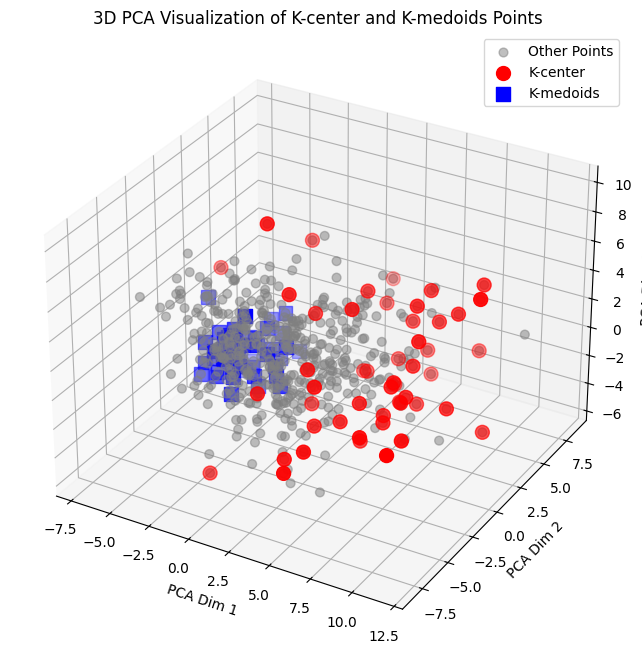

In [28]:
from sklearn.decomposition import PCA

def visualize_in_3d_pca(image_features_dict, selected_images_k_center, selected_images_k_medoids):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    # Use PCA to reduce the features to 3 dimensions
    pca = PCA(n_components=3)
    reduced_features = pca.fit_transform(features)

    # Prepare a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the points
    ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], color='gray', alpha=0.5, s=40, label='Other Points')

    # Plot the K-center points
    k_center_indices = [i for i, name in enumerate(image_names) if name in selected_images_k_center]
    k_center_features = reduced_features[k_center_indices]
    ax.scatter(k_center_features[:, 0], k_center_features[:, 1], k_center_features[:, 2], color='red', s=100, marker='o', label='K-center')

    # Plot the K-medoids points
    k_medoids_indices = [i for i, name in enumerate(image_names) if name in selected_images_k_medoids]
    k_medoids_features = reduced_features[k_medoids_indices]
    ax.scatter(k_medoids_features[:, 0], k_medoids_features[:, 1], k_medoids_features[:, 2], color='blue', s=100, marker='s', label='K-medoids')

    # Add titles and legend
    ax.set_title("3D PCA Visualization of K-center and K-medoids Points")
    ax.set_xlabel('PCA Dim 1')
    ax.set_ylabel('PCA Dim 2')
    ax.set_zlabel('PCA Dim 3')
    ax.legend(loc='best')

    plt.show()

# Example call for visualization
visualize_in_3d_pca(image_features_dict, selected_images_k_center, selected_images_k_medoids)


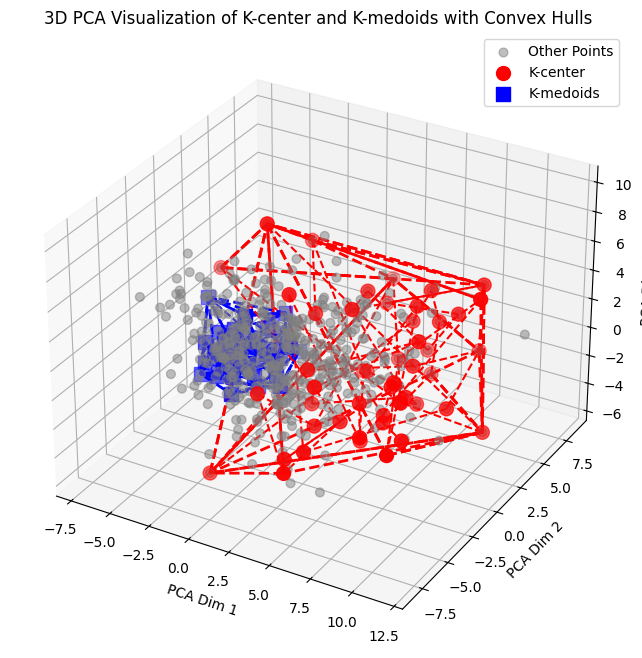

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Function to visualize with t-SNE/PCA and include Convex Hull
def visualize_best_3d(image_features_dict, selected_images_k_center, selected_images_k_medoids, use_tsne=True):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))

    if use_tsne:
        # Use t-SNE to reduce features to 3D
        tsne = TSNE(n_components=3, random_state=42, perplexity=30)
        reduced_features = tsne.fit_transform(features)
        method_name = 't-SNE'
    else:
        # Use PCA to reduce features to 3D
        pca = PCA(n_components=3)
        reduced_features = pca.fit_transform(features)
        method_name = 'PCA'

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot all points in light color
    ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], color='gray', alpha=0.5, s=40, label='Other Points')

    # Plot K-center points
    k_center_indices = [i for i, name in enumerate(image_names) if name in selected_images_k_center]
    k_center_features = reduced_features[k_center_indices]
    ax.scatter(k_center_features[:, 0], k_center_features[:, 1], k_center_features[:, 2], color='red', s=100, marker='o', label='K-center')

    # Plot K-medoids points
    k_medoids_indices = [i for i, name in enumerate(image_names) if name in selected_images_k_medoids]
    k_medoids_features = reduced_features[k_medoids_indices]
    ax.scatter(k_medoids_features[:, 0], k_medoids_features[:, 1], k_medoids_features[:, 2], color='blue', s=100, marker='s', label='K-medoids')

    # Draw Convex Hull around K-center points (if more than 3 points)
    if len(k_center_features) >= 3:
        hull = ConvexHull(k_center_features)
        for simplex in hull.simplices:
            ax.plot(k_center_features[simplex, 0], k_center_features[simplex, 1], k_center_features[simplex, 2], 'r--', lw=2)

    # Draw Convex Hull around K-medoids points (if more than 3 points)
    if len(k_medoids_features) >= 3:
        hull = ConvexHull(k_medoids_features)
        for simplex in hull.simplices:
            ax.plot(k_medoids_features[simplex, 0], k_medoids_features[simplex, 1], k_medoids_features[simplex, 2], 'b--', lw=2)

    # Connect K-center points with lines
    for i in range(1, len(k_center_features)):
        ax.plot([k_center_features[i-1, 0], k_center_features[i, 0]], 
                [k_center_features[i-1, 1], k_center_features[i, 1]], 
                [k_center_features[i-1, 2], k_center_features[i, 2]], 'r--', lw=1.5)

    # Connect K-medoids points with lines
    for i in range(1, len(k_medoids_features)):
        ax.plot([k_medoids_features[i-1, 0], k_medoids_features[i, 0]], 
                [k_medoids_features[i-1, 1], k_medoids_features[i, 1]], 
                [k_medoids_features[i-1, 2], k_medoids_features[i, 2]], 'b--', lw=1.5)

    # Labels and legend
    ax.set_title(f"3D {method_name} Visualization of K-center and K-medoids with Convex Hulls")
    ax.set_xlabel(f'{method_name} Dim 1')
    ax.set_ylabel(f'{method_name} Dim 2')
    ax.set_zlabel(f'{method_name} Dim 3')
    ax.legend(loc='best')

    plt.show()

# Call the function for the best visualization
# visualize_best_3d(image_features_dict, selected_images_k_center, selected_images_k_medoids, use_tsne=True)  # For t-SNE
visualize_best_3d(image_features_dict, selected_images_k_center, selected_images_k_medoids, use_tsne=False)  # For PCA


1. Coverage Ratio (Average Distance to Nearest Representative)
Definition: Measures the average distance from all points in the cluster to their nearest representative (K-center or K-medoids).
Interpretation: A lower value indicates better coverage since all points in the cluster are close to one of the selected representative points.
Formula:

Coverage Ratio
=
1
𝑁
∑
𝑖
=
1
𝑁
min
⁡
𝑗
∈
selected
𝑑
(
𝑥
𝑖
,
𝑐
𝑗
)
Coverage Ratio= 
N
1
​
  
i=1
∑
N
​
  
j∈selected
min
​
 d(x 
i
​
 ,c 
j
​
 )
where 
𝑥
𝑖
x 
i
​
  are the points in the cluster, 
𝑐
𝑗
c 
j
​
  are the selected representative points, and 
𝑑
(
⋅
)
d(⋅) is the distance function.

2. Maximum Coverage Distance
Definition: Measures the maximum distance from any point in the cluster to its nearest representative.
Interpretation: A lower value means that the farthest point is still relatively close to a representative, indicating good coverage.
3. Diversity of Representatives (Pairwise Distance Among Representatives)
Definition: Measures the average pairwise distance between the selected K-center or K-medoids points themselves.
Interpretation: A higher value indicates that the representatives are well spread out and diverse, covering different areas of the cluster.
Formula:

Diversity
=
1
𝐾
(
𝐾
−
1
)
∑
𝑖
=
1
𝐾
∑
𝑗
=
𝑖
+
1
𝐾
𝑑
(
𝑐
𝑖
,
𝑐
𝑗
)
Diversity= 
K(K−1)
1
​
  
i=1
∑
K
​
  
j=i+1
∑
K
​
 d(c 
i
​
 ,c 
j
​
 )
where 
𝑐
𝑖
c 
i
​
  and 
𝑐
𝑗
c 
j
​
  are the selected representative points.

4. Silhouette Score
Definition: Measures how similar each point is to its own cluster compared to other clusters. It’s typically used for clustering evaluation, but here you can use it to evaluate how well the selected points represent their cluster.
Interpretation: A higher silhouette score (between -1 and 1) indicates that the points are well matched to their own cluster and far from other clusters.

In [31]:
import numpy as np
from sklearn.metrics import pairwise_distances

# Function to compute the coverage ratio
def compute_coverage_ratio(features, selected_indices):
    distances = pairwise_distances(features, features[selected_indices])
    min_distances = np.min(distances, axis=1)
    coverage_ratio = np.mean(min_distances)
    return coverage_ratio

# Function to compute the maximum coverage distance
def compute_max_coverage_distance(features, selected_indices):
    distances = pairwise_distances(features, features[selected_indices])
    min_distances = np.min(distances, axis=1)
    max_coverage_distance = np.max(min_distances)
    return max_coverage_distance

# Function to compute diversity (average pairwise distance between selected points)
def compute_diversity(features, selected_indices):
    selected_features = features[selected_indices]
    pairwise_dist = pairwise_distances(selected_features)
    diversity = np.mean(pairwise_dist[np.triu_indices(len(selected_indices), 1)])  # Only upper triangle
    return diversity

# Example evaluation function for both K-center and K-medoids
def evaluate_representatives(image_features_dict, selected_images_k_center, selected_images_k_medoids):
    image_names = list(image_features_dict.keys())
    features = np.array(list(image_features_dict.values()))
    
    # Find the indices of the selected representatives
    k_center_indices = [i for i, name in enumerate(image_names) if name in selected_images_k_center]
    k_medoids_indices = [i for i, name in enumerate(image_names) if name in selected_images_k_medoids]
    
    # Compute metrics for K-center
    k_center_coverage_ratio = compute_coverage_ratio(features, k_center_indices)
    k_center_max_distance = compute_max_coverage_distance(features, k_center_indices)
    k_center_diversity = compute_diversity(features, k_center_indices)
    
    # Compute metrics for K-medoids
    k_medoids_coverage_ratio = compute_coverage_ratio(features, k_medoids_indices)
    k_medoids_max_distance = compute_max_coverage_distance(features, k_medoids_indices)
    k_medoids_diversity = compute_diversity(features, k_medoids_indices)
    
    # Print the results
    print("K-center Results:")
    print(f"Coverage Ratio: {k_center_coverage_ratio}")
    print(f"Maximum Coverage Distance: {k_center_max_distance}")
    print(f"Diversity: {k_center_diversity}")
    
    print("\nK-medoids Results:")
    print(f"Coverage Ratio: {k_medoids_coverage_ratio}")
    print(f"Maximum Coverage Distance: {k_medoids_max_distance}")
    print(f"Diversity: {k_medoids_diversity}")

# Example call to evaluate representatives
evaluate_representatives(image_features_dict, selected_images_k_center, selected_images_k_medoids)


K-center Results:
Coverage Ratio: 10.949853897094727
Maximum Coverage Distance: 15.011241912841797
Diversity: 19.150402069091797

K-medoids Results:
Coverage Ratio: 9.728267669677734
Maximum Coverage Distance: 20.80042266845703
Diversity: 9.353074073791504


Steps:
Coverage Ratio: Measures how well the selected points cover the entire cluster by computing the average minimum distance between any point and its nearest representative.
Maximum Coverage Distance: Shows the worst-case coverage scenario by finding the farthest point from the nearest representative.
Diversity: Measures the spread of the selected points, ensuring that the representatives are diverse.
Interpretation:
K-center vs. K-medoids: Compare the results for K-center and K-medoids using these metrics to determine which approach better covers the cluster.
Lower Coverage Ratio and Maximum Distance are preferred (indicating better coverage).
Higher Diversity is preferred (indicating better spread).
This approach will give you a clear quantitative comparison to decide which method best represents the cluster. Let me know if you need further help refining this!

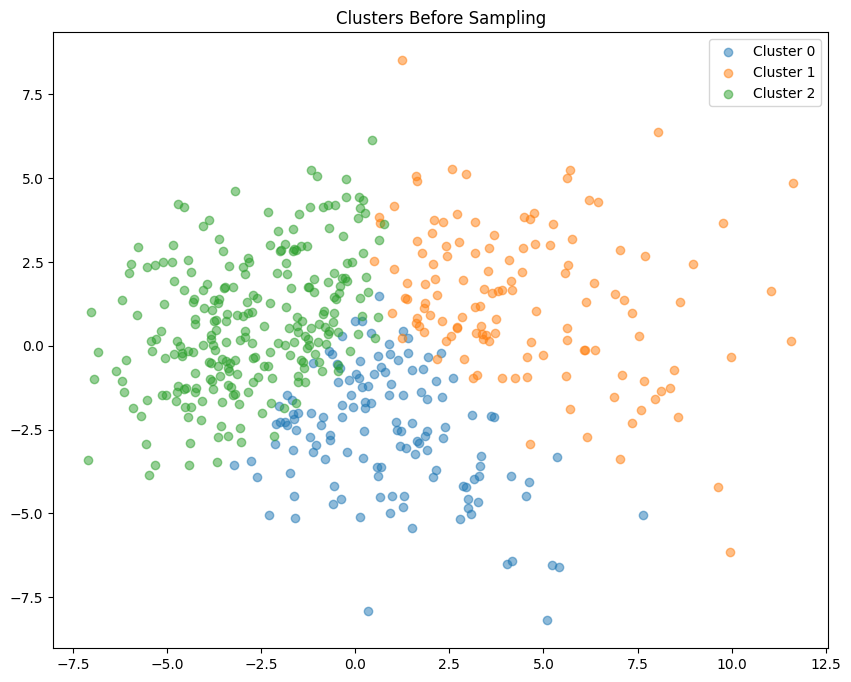

In [33]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Example clustering function
def cluster_data(image_features_dict, n_clusters):
    features = np.array(list(image_features_dict.values()))
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    
    # Return the labels and centers
    return cluster_labels, kmeans.cluster_centers_

# Visualize clusters before sampling
def visualize_clusters_before_sampling(image_features_dict, cluster_labels, use_tsne=True):
    features = np.array(list(image_features_dict.values()))
    
    # Dimensionality Reduction: PCA or t-SNE
    if use_tsne:
        from sklearn.manifold import TSNE
        tsne = TSNE(n_components=2, random_state=42, perplexity=30)
        reduced_features = tsne.fit_transform(features)
    else:
        pca = PCA(n_components=2)
        reduced_features = pca.fit_transform(features)

    # Plot clusters
    plt.figure(figsize=(10, 8))
    for cluster_id in np.unique(cluster_labels):
        cluster_points = reduced_features[cluster_labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id}", alpha=0.5)

    plt.title('Clusters Before Sampling')
    plt.legend()
    plt.show()

# Example usage
cluster_labels, cluster_centers = cluster_data(image_features_dict, n_clusters=3)
visualize_clusters_before_sampling(image_features_dict, cluster_labels, use_tsne=False)


In [34]:
from sklearn.metrics import pairwise_distances
import random

# Sample representatives using K-center approach
def k_center_sampling(features, n_representatives):
    selected = [random.choice(range(len(features)))]  # Start with a random point
    for _ in range(n_representatives - 1):
        # Find the point farthest from the selected points
        dist_matrix = pairwise_distances(features, features[selected])
        min_distances = np.min(dist_matrix, axis=1)
        new_point = np.argmax(min_distances)
        selected.append(new_point)
    return selected

# Sample representatives using K-medoids approach
def k_medoids_sampling(features, n_representatives):
    medoids = random.sample(range(len(features)), n_representatives)
    return medoids

# Apply sampling for each cluster
def sample_representatives_per_cluster(image_features_dict, cluster_labels, n_representatives):
    features = np.array(list(image_features_dict.values()))
    selected_k_center = {}
    selected_k_medoids = {}

    for cluster_id in np.unique(cluster_labels):
        cluster_indices = np.where(cluster_labels == cluster_id)[0]
        cluster_features = features[cluster_indices]
        
        k_center_indices = k_center_sampling(cluster_features, n_representatives)
        k_medoids_indices = k_medoids_sampling(cluster_features, n_representatives)
        
        selected_k_center[cluster_id] = cluster_indices[k_center_indices]
        selected_k_medoids[cluster_id] = cluster_indices[k_medoids_indices]

    return selected_k_center, selected_k_medoids

# Example sampling
selected_k_center, selected_k_medoids = sample_representatives_per_cluster(image_features_dict, cluster_labels, n_representatives=5)


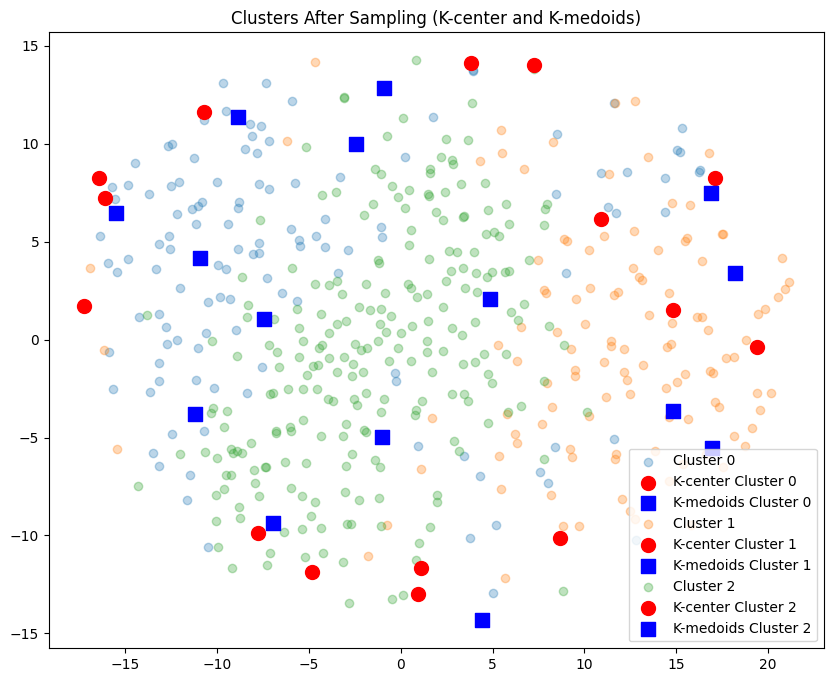

In [35]:
# Visualize clusters after sampling
def visualize_clusters_after_sampling(image_features_dict, cluster_labels, selected_k_center, selected_k_medoids, use_tsne=True):
    features = np.array(list(image_features_dict.values()))

    # Dimensionality Reduction: PCA or t-SNE
    if use_tsne:
        from sklearn.manifold import TSNE
        tsne = TSNE(n_components=2, random_state=42, perplexity=30)
        reduced_features = tsne.fit_transform(features)
    else:
        pca = PCA(n_components=2)
        reduced_features = pca.fit_transform(features)

    # Plot clusters with selected K-center and K-medoids points
    plt.figure(figsize=(10, 8))

    for cluster_id in np.unique(cluster_labels):
        cluster_points = reduced_features[cluster_labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id}", alpha=0.3)
        
        # Plot K-center representatives
        k_center_points = reduced_features[selected_k_center[cluster_id]]
        plt.scatter(k_center_points[:, 0], k_center_points[:, 1], color='red', marker='o', s=100, label=f"K-center Cluster {cluster_id}")
        
        # Plot K-medoids representatives
        k_medoids_points = reduced_features[selected_k_medoids[cluster_id]]
        plt.scatter(k_medoids_points[:, 0], k_medoids_points[:, 1], color='blue', marker='s', s=100, label=f"K-medoids Cluster {cluster_id}")

    plt.title('Clusters After Sampling (K-center and K-medoids)')
    plt.legend()
    plt.show()

# Visualize the sampled clusters
visualize_clusters_after_sampling(image_features_dict, cluster_labels, selected_k_center, selected_k_medoids, use_tsne=True)


In [36]:
# Function to compute metrics for each cluster
def evaluate_clusters(image_features_dict, cluster_labels, selected_k_center, selected_k_medoids):
    features = np.array(list(image_features_dict.values()))
    
    for cluster_id in np.unique(cluster_labels):
        cluster_indices = np.where(cluster_labels == cluster_id)[0]
        cluster_features = features[cluster_indices]
        
        print(f"Cluster {cluster_id}:")

        # K-center metrics
        print("K-center Metrics:")
        k_center_coverage_ratio = compute_coverage_ratio(cluster_features, selected_k_center[cluster_id])
        k_center_max_distance = compute_max_coverage_distance(cluster_features, selected_k_center[cluster_id])
        k_center_diversity = compute_diversity(cluster_features, selected_k_center[cluster_id])
        print(f"Coverage Ratio: {k_center_coverage_ratio}")
        print(f"Max Coverage Distance: {k_center_max_distance}")
        print(f"Diversity: {k_center_diversity}")
        
        # K-medoids metrics
        print("K-medoids Metrics:")
        k_medoids_coverage_ratio = compute_coverage_ratio(cluster_features, selected_k_medoids[cluster_id])
        k_medoids_max_distance = compute_max_coverage_distance(cluster_features, selected_k_medoids[cluster_id])
        k_medoids_diversity = compute_diversity(cluster_features, selected_k_medoids[cluster_id])
        print(f"Coverage Ratio: {k_medoids_coverage_ratio}")
        print(f"Max Coverage Distance: {k_medoids_max_distance}")
        print(f"Diversity: {k_medoids_diversity}")
        print("\n")

# Evaluate clusters
evaluate_clusters(image_features_dict, cluster_labels, selected_k_center, selected_k_medoids)


Cluster 0:
K-center Metrics:


IndexError: index 161 is out of bounds for axis 0 with size 132